In [16]:
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(*(['..' + os.sep] * 1))))

from datetime import date

from morning.pipeline.stream.cybos.stock.db.min_tick import MinTick
from morning.pipeline.converter.cybos.stock.day_tick import StockDayTickConverter
from morning.pipeline.strategy.stock.minute_suppressed import MinuteSuppressed
from morning.needle.tick_min_graph_needle import TickMinGraphNeedle

In [23]:
from scipy.signal import find_peaks, peak_prominences
import numpy as np


def _calculate(x):
    peaks, _ = find_peaks(x, distance=10)
    prominences = peak_prominences(x, peaks)[0]
    print('PEAKS', peaks)
    print('PROMINENCES', prominences)
    peaks = np.extract(prominences > x.mean() * 0.003, peaks)
    prominences = np.extract(prominences > x.mean() * 0.003, prominences)
    #peaks = np.r_[np.array([0]), peaks]
    return peaks, prominences

In [24]:
#get_day_minute_period_data('A005290', from_date, from_date)
class Decision:
    def __init__(self):
        pass
    
    def received(self, datas):
        print(datas)
        
    def finalize(self):
        print('finalize')
        
min_tick = MinTick(date(2019, 12, 17))
min_tick.set_target('A005290')
sdtc = StockDayTickConverter()
needle = TickMinGraphNeedle()

min_tick.set_output(sdtc)
ms = MinuteSuppressed()
ms._calculate = _calculate
ms.add_graph(needle)
sdtc.set_output(ms)
decision = Decision()
ms.set_output(decision)

while min_tick.received(None) > 0:
    pass

min_tick.finalize()
needle.figure

Length 381
PEAKS [2]
PROMINENCES [16.66666667]
PEAKS []
PROMINENCES []
PEAKS [2]
PROMINENCES [16.66666667]
PEAKS []
PROMINENCES []
PEAKS [2]
PROMINENCES [16.66666667]
PEAKS []
PROMINENCES []
PEAKS [2]
PROMINENCES [16.66666667]
PEAKS []
PROMINENCES []
PEAKS [2]
PROMINENCES [16.66666667]
PEAKS []
PROMINENCES []
PEAKS [2]
PROMINENCES [16.66666667]
PEAKS []
PROMINENCES []
PEAKS [2]
PROMINENCES [16.66666667]
PEAKS []
PROMINENCES []
PEAKS [2]
PROMINENCES [16.66666667]
PEAKS [15]
PROMINENCES [5.]
PEAKS [2]
PROMINENCES [16.66666667]
PEAKS [15]
PROMINENCES [10.]
PEAKS [2]
PROMINENCES [16.66666667]
PEAKS [15]
PROMINENCES [20.]
PEAKS [2]
PROMINENCES [16.66666667]
PEAKS [15]
PROMINENCES [30.]
PEAKS [2]
PROMINENCES [16.66666667]
PEAKS [15]
PROMINENCES [40.]
PEAKS [2]
PROMINENCES [16.66666667]
PEAKS [15]
PROMINENCES [50.]
set_circle_flag 2019-12-17 09:16:00 15705.0 False
PEAKS [2]
PROMINENCES [16.66666667]
PEAKS [15]
PROMINENCES [70.]
PEAKS [2]
PROMINENCES [16.66666667]
PEAKS [15]
PROMINENCES [90.]


PEAKS [ 15  34  53  86 122 142]
PROMINENCES [111.66666667   5.          20.           5.         130.
   5.        ]
PEAKS [  2  31  46  84 102 120 137]
PROMINENCES [ 16.66666667   5.          20.           5.         155.
   5.          10.        ]
PEAKS [ 15  34  53  86 122 142]
PROMINENCES [111.66666667   5.          20.           5.         130.
   5.        ]
PEAKS [  2  31  46  84 102 120 137]
PROMINENCES [ 16.66666667   5.          20.           5.         155.
   5.          15.        ]
PEAKS [ 15  34  53  86 122 142]
PROMINENCES [111.66666667   5.          20.           5.         130.
   5.        ]
PEAKS [  2  31  46  84 102 120 137]
PROMINENCES [ 16.66666667   5.          20.           5.         155.
   5.          15.        ]
PEAKS [ 15  34  53  86 122 142]
PROMINENCES [111.66666667   5.          20.           5.         130.
   5.        ]
PEAKS [  2  31  46  84 102 120 137]
PROMINENCES [ 16.66666667   5.          20.           5.         155.
   5.          15.      

  15.          40.           5.          35.        ]
PEAKS [  2  31  46  84 102 120 137 164 179 189 218 245]
PROMINENCES [ 16.66666667   5.          20.           5.         155.
   5.          15.          40.           5.           5.
  35.           5.        ]
PEAKS [ 15  34  53  86 122 149 180 193 233]
PROMINENCES [111.66666667   5.          20.           5.         155.
  15.          40.           5.          35.        ]
PEAKS [  2  31  46  84 102 120 137 164 179 189 218 245]
PROMINENCES [ 16.66666667   5.          20.           5.         155.
   5.          15.          40.           5.           5.
  35.          10.        ]
PEAKS [ 15  34  53  86 122 149 180 193 233]
PROMINENCES [111.66666667   5.          20.           5.         155.
  15.          40.           5.          35.        ]
PEAKS [  2  31  46  84 102 120 137 164 179 189 218 245]
PROMINENCES [ 16.66666667   5.          20.           5.         155.
   5.          15.          40.           5.           5.
  

PEAKS [ 15  34  53  86 119 149 177 193 233 264 284 303]
PROMINENCES [111.66666667   5.          20.           5.         155.
  15.          40.           5.          35.         125.
  35.          15.        ]
PEAKS [  2  31  46  84 102 120 137 164 179 189 218 245 274 295 319]
PROMINENCES [ 16.66666667   5.          20.           5.         155.
   5.          15.          40.           5.           5.
  35.         130.          35.          15.          45.        ]
PEAKS [ 15  34  53  86 119 149 177 193 233 264 284 303]
PROMINENCES [111.66666667   5.          20.           5.         155.
  15.          40.           5.          35.         125.
  35.          15.        ]
PEAKS [  2  31  46  84 102 120 137 164 179 189 218 245 274 295 319]
PROMINENCES [ 16.66666667   5.          20.           5.         155.
   5.          15.          40.           5.           5.
  35.         130.          35.          15.          45.        ]
PEAKS [ 15  34  53  86 119 149 177 193 233 264 284

finalize


[ 1  4  7 11]
(array([1., 1., 1., 1.]), array([0, 2, 2, 2], dtype=int32), array([ 2,  5,  8, 12], dtype=int32))


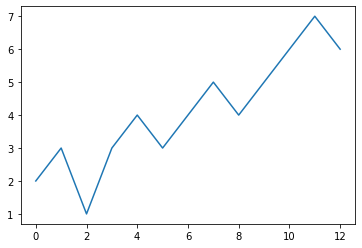

In [31]:
import matplotlib.pyplot as plt
x = np.array([2, 3, 1, 3, 4, 3, 4, 5, 4, 5, 6, 7, 6])

peaks, _ = find_peaks(x)
prominences = peak_prominences(x, peaks)
print(peaks)
print(prominences)
plt.plot(x)

### prominences
* 하나의 peak을 기준으로, 높이가 같지 않은 좌, 우의 peak 을 경계로 양쪽의 가장 낮은 값 중 높은 값을 결과로 선택
* (문서 설명) 해당 peak 에서 좌우로 수평선을 그어(같은 값은 무시), 기울기에 닫는 부분을 경계로, 양쪽 가장 낮은 값 중 높은 값을 기준으로 peak 점의 값과 선택된 값의 차를 낸다

### 호가단위
| 가격 | 호가  |
|------|-------|
|1000원 미만| 1원|
|1000~5000 미만| 5원|
|5000~10000 미만| 10원|
|10000~50000 미만| 50원|
|50000~100000 미만 | 100원|
|100000~500000 미만 | 500원|
|500000 이상 | 1000원 |

[ 3 11]
(array([3., 5.]), array([0, 6], dtype=int32), array([ 6, 18], dtype=int32))


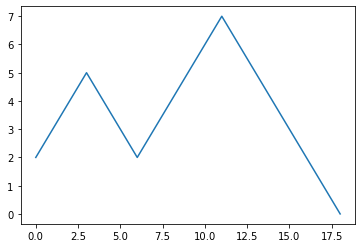

In [34]:
import matplotlib.pyplot as plt
x = np.array([2, 3, 4, 5, 4, 3, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1, 0])

peaks, _ = find_peaks(x)
prominences = peak_prominences(x, peaks)
print(peaks)
print(prominences)
plt.plot(x)